In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
directory = '../dataset/'
ori_name = ['AMD.csv', 'FB.csv', 'FSV.csv', 'INFY.csv', 'KNX.csv',
          'MONDY.csv', 'MTDR.csv', 'SINA.csv', 'TMUS.csv', 'TSLA.csv', 'TWTR.csv']
stocks = [directory + s for s in ori_name]
stocks

['../dataset/AMD.csv',
 '../dataset/FB.csv',
 '../dataset/FSV.csv',
 '../dataset/INFY.csv',
 '../dataset/KNX.csv',
 '../dataset/MONDY.csv',
 '../dataset/MTDR.csv',
 '../dataset/SINA.csv',
 '../dataset/TMUS.csv',
 '../dataset/TSLA.csv',
 '../dataset/TWTR.csv']

In [3]:
dfs = [pd.read_csv(s)[['Date', 'Close']] for s in stocks]

In [4]:
from functools import reduce
data = reduce(lambda left,right: pd.merge(left,right,on='Date'), dfs).iloc[:, 1:]
data

,Close_x,Close_y,Close_x,Close_y,Close_x,Close_y,Close_x,Close_y,Close_x,Close_y,Close
0,16.270000,207.320007,78.820000,9.710,37.910000,56.889999,31.809999,84.070000,61.680000,318.869995,44.490002
1,16.580000,207.229996,78.250000,9.800,36.360001,56.639999,31.670000,83.949997,61.630001,310.100006,44.259998
2,16.870001,209.990005,77.940002,9.950,36.279999,57.730000,32.020000,84.870003,61.209999,322.690002,44.709999
3,16.850000,209.360001,77.940002,9.840,37.500000,57.810001,31.740000,83.989998,60.520000,323.850006,43.340000
4,16.709999,208.089996,78.055000,9.855,37.990002,52.380001,32.330002,82.940002,59.410000,320.230011,43.439999
...,...,...,...,...,...,...,...,...,...,...,...
169,23.250000,160.470001,84.260002,10.720,34.590000,49.060001,19.129999,58.209999,73.680000,269.489990,31.080000
170,26.000000,161.570007,83.980003,10.900,32.849998,48.060001,19.059999,58.540001,72.589996,267.470001,31.270000
171,25.700001,165.440002,83.970001,10.940,31.870001,48.750000,19.650000,58.439999,72.059998,273.600006,32.570000
172,27.889999,166.080002,85.370003,11.060,32.230000,48.750000,20.000000,59.139999,72.260002,274.019989,32.610001


In [5]:
returns = data.pct_change()
mean_daily_returns = returns.mean()
volatilities = returns.std()

In [6]:
mean_daily_returns * 174

Close_x    0.687152
Close_y   -0.171203
Close_x    0.082634
Close_y    0.131774
Close_x   -0.121120
Close_y   -0.117728
Close_x   -0.432415
Close_y   -0.311346
Close_x    0.174341
Close_y   -0.047832
Close     -0.189020
dtype: float64

In [7]:
volatilities * 174

Close_x    8.421484
Close_y    4.582811
Close_x    2.539457
Close_y    2.466974
Close_x    4.905767
Close_y    5.461090
Close_x    5.607862
Close_y    4.797597
Close_x    2.667653
Close_y    7.052340
Close      6.126757
dtype: float64

In [8]:
combine = pd.DataFrame({'returns': mean_daily_returns * 174,
                       'volatility': volatilities * 174})
combine

,returns,volatility
Close_x,0.687152,8.421484
Close_y,-0.171203,4.582811
Close_x,0.082634,2.539457
Close_y,0.131774,2.466974
Close_x,-0.121120,4.905767
Close_y,-0.117728,5.461090
Close_x,-0.432415,5.607862
Close_y,-0.311346,4.797597
Close_x,0.174341,2.667653
Close_y,-0.047832,7.052340


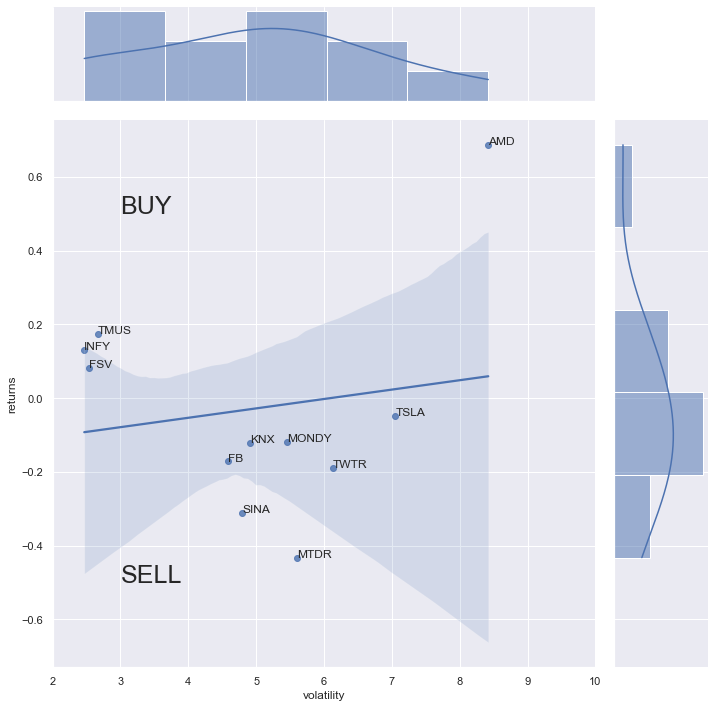

In [36]:
g = sns.jointplot( data=combine,  x="volatility", y="returns",  xlim=(2, 10), height=10, kind="reg", marker="o", marginal_ticks=False)

for i in range(combine.shape[0]):
    g.ax_joint.annotate(ori_name[i].replace('.csv',''), (combine.iloc[i, 1], combine.iloc[i, 0]))
    
g.ax_joint.text(3, -0.5, 'SELL', fontsize=25)
g.ax_joint.text(3, 0.5, 'BUY', fontsize=25)

plt.show()